In [143]:
#521H0438_NGUYỄN TẤN BẢO 
#REQUIRE 1

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [145]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [146]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [147]:
df.shape

(2823, 25)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [149]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [150]:
#Ham dien cac gia tri thieu bang cac gia tri xuat hien nhieu lan
def impute_most_frequent_labels(df):
    # List nhung cot co gia tri rong
    columns_to_impute = ["STATE", "POSTALCODE", "TERRITORY"]

    for column in columns_to_impute:
        most_occuring_label = df[column].mode()[0]
        df[column].fillna(most_occuring_label, inplace=True)

    return df

df = impute_most_frequent_labels(df)

In [151]:
df.drop(['ADDRESSLINE2','ORDERDATE','PHONE','CUSTOMERNAME','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis=1, inplace = True)

In [152]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,54,S72_3212,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Small
2819,10373,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,54,S72_3212,Torikatu 38,Oulu,CA,90110,Finland,EMEA,Medium
2820,10386,43,100.00,4,5417.57,Resolved,1,3,2005,Ships,54,S72_3212,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Medium
2821,10397,34,62.24,1,2116.16,Shipped,1,3,2005,Ships,54,S72_3212,1 rue Alsace-Lorraine,Toulouse,CA,31000,France,EMEA,Small


In [153]:
# Visualize

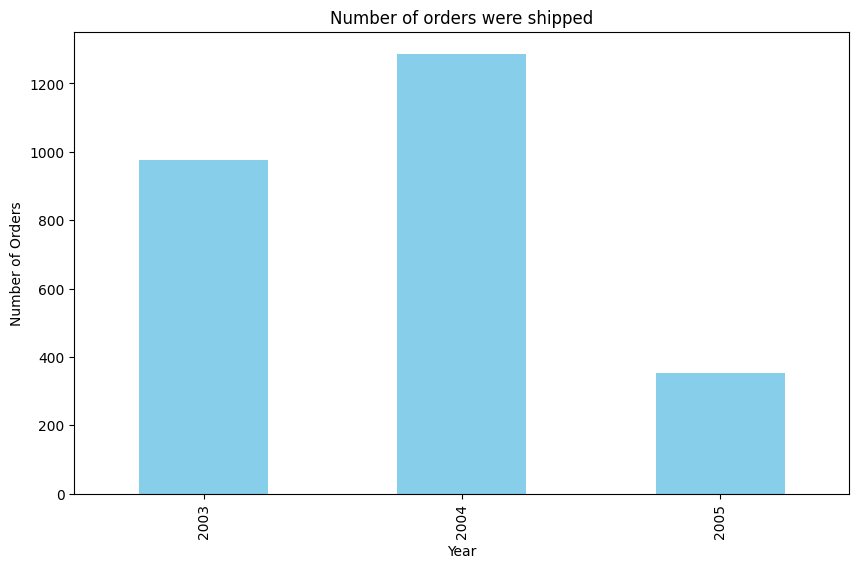

In [154]:

# Filter data for orders with STATUS 'Shipped'
shipped_data = df[df['STATUS'] == 'Shipped']

# Count the number of shipped orders for each year
shipped_counts_by_year = shipped_data.groupby('YEAR_ID').size()

# Plotting
plt.figure(figsize=(10, 6))
shipped_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of orders were shipped')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

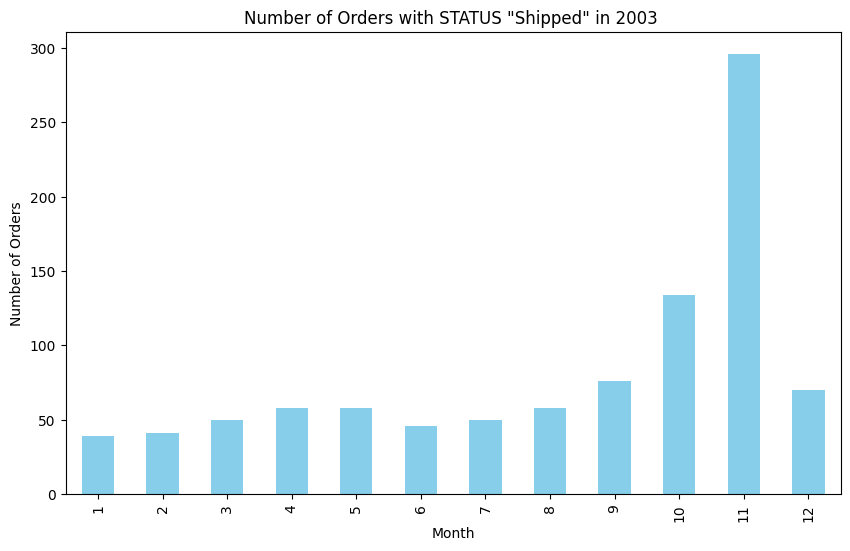

In [155]:
# Filter data for orders in the year 2003 with STATUS 'Shipped'
shipped_data_2003 = df[(df['STATUS'] == 'Shipped') & (df['YEAR_ID'] == 2003)]

# Count the number of shipped orders for each month in 2003
shipped_counts_by_month_2003 = shipped_data_2003.groupby('MONTH_ID').size()

# Plotting
plt.figure(figsize=(10, 6))
shipped_counts_by_month_2003.plot(kind='bar', color='skyblue')
plt.title('Number of Orders with STATUS "Shipped" in 2003 ')


plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

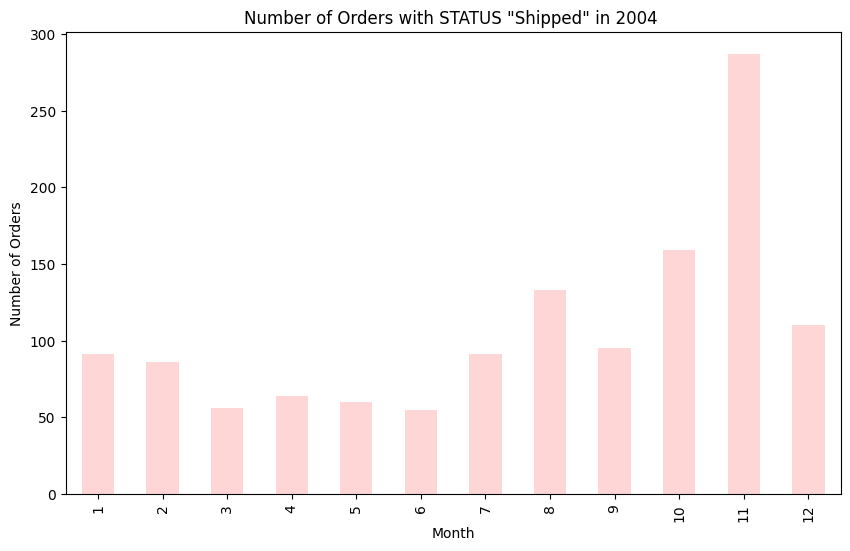

In [156]:
# Filter data for orders in the year 2003 with STATUS 'Shipped'
shipped_data_2003 = df[(df['STATUS'] == 'Shipped') & (df['YEAR_ID'] == 2004)]

# Count the number of shipped orders for each month in 2003
shipped_counts_by_month_2003 = shipped_data_2003.groupby('MONTH_ID').size()

# Plotting
plt.figure(figsize=(10, 6))
shipped_counts_by_month_2003.plot(kind='bar', color='#F333')
plt.title('Number of Orders with STATUS "Shipped" in 2004 ')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

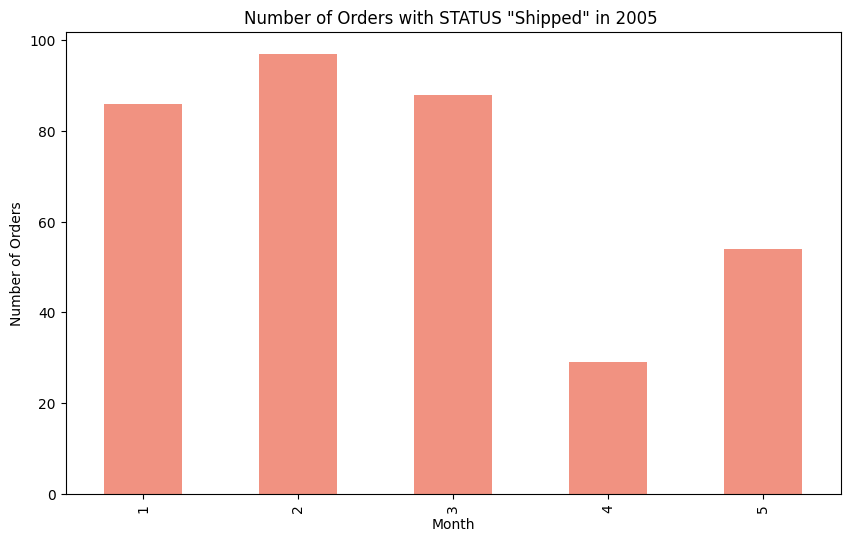

In [157]:
# Filter data for orders in the year 2003 with STATUS 'Shipped'
shipped_data_2003 = df[(df['STATUS'] == 'Shipped') & (df['YEAR_ID'] == 2005)]

# Count the number of shipped orders for each month in 2003
shipped_counts_by_month_2003 = shipped_data_2003.groupby('MONTH_ID').size()

# Plotting
plt.figure(figsize=(10, 6))
shipped_counts_by_month_2003.plot(kind='bar', color='#F19281')
plt.title('Number of Orders with STATUS "Shipped" in 2005 ')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

In [158]:
df.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [159]:
df['STATUS'] = df['STATUS'].replace(['Shipped','Cancelled','Resolved','On Hold','In Process','Disputed'],['1','0','0','0','0','0'])

In [160]:
df.STATUS.value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [161]:
label = df['STATUS']
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,Motorcycles,95,S10_1678,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Small
1,10121,34,81.35,5,2765.90,1,2,5,2003,Motorcycles,95,S10_1678,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Small
2,10134,41,94.74,2,3884.34,1,3,7,2003,Motorcycles,95,S10_1678,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,1,3,8,2003,Motorcycles,95,S10_1678,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Medium
4,10159,49,100.00,14,5205.27,1,4,10,2003,Motorcycles,95,S10_1678,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,1,4,12,2004,Ships,54,S72_3212,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Small
2819,10373,29,100.00,1,3978.51,1,1,1,2005,Ships,54,S72_3212,Torikatu 38,Oulu,CA,90110,Finland,EMEA,Medium
2820,10386,43,100.00,4,5417.57,0,1,3,2005,Ships,54,S72_3212,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Medium
2821,10397,34,62.24,1,2116.16,1,1,3,2005,Ships,54,S72_3212,1 rue Alsace-Lorraine,Toulouse,CA,31000,France,EMEA,Small


In [162]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành features (X) và nhãn (y)
X = df.drop("STATUS", axis=1)
y = df["STATUS"]

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Chọn cột kiểu số và kiểu category
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Tiền xử lý cho các cột kiểu số
numeric_transformer = StandardScaler()

# Tiền xử lý cho các cột kiểu category
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Tạo preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Áp dụng preprocessor cho tập huấn luyện và tập kiểm tra
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [164]:
#Nguyễn Tấn Bảo_ 521H0438
#REQUIRE 2

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo và đào tạo mô hình Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_processed, y_train)

y_pred_test = logistic_model.predict(X_test_processed)

accuracy_test_log = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set (Logistic Regression):", accuracy_test_log)
# Khởi tạo và đào tạo mô hình Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_processed, y_train)

y_pred_test_rf = random_forest_model.predict(X_test_processed)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Accuracy on Test Set (Random Forest):", accuracy_test_rf)

# Khởi tạo và đào tạo mô hình Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_processed, y_train)

y_pred_test_dt = decision_tree_model.predict(X_test_processed)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
print("Accuracy on Test Set (Decision Tree):", accuracy_test_dt)

# Khởi tạo và đào tạo mô hình SVC

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_processed, y_train)

y_pred_test_svm = svm_model.predict(X_test_processed)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Accuracy on Test Set (SVM):", accuracy_test_svm)

# Khởi tạo và đào tạo mô hình KNeighbors

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_processed, y_train)

y_pred_test_knn = knn_model.predict(X_test_processed)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy on Test Set (KNN):", accuracy_test_knn)

# Khởi tạo và đào tạo mô hình GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_processed, y_train)

y_pred_test_gb = gb_model.predict(X_test_processed)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)
print("Accuracy on Test Set (Gradient Boosting):", accuracy_test_gb)

from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier()
nn_model.fit(X_train_processed, y_train)

y_pred_test_nn = nn_model.predict(X_test_processed)
accuracy_test_nn = accuracy_score(y_test, y_pred_test_nn)
print("Accuracy on Test Set (Neural Network):", accuracy_test_nn)

Accuracy on Test Set (Logistic Regression): 0.9203539823008849
Accuracy on Test Set (Random Forest): 0.9946902654867257
Accuracy on Test Set (Decision Tree): 0.9964601769911504
Accuracy on Test Set (SVM): 0.9380530973451328
Accuracy on Test Set (KNN): 0.9646017699115044
Accuracy on Test Set (Gradient Boosting): 1.0
Accuracy on Test Set (Neural Network): 0.9734513274336283


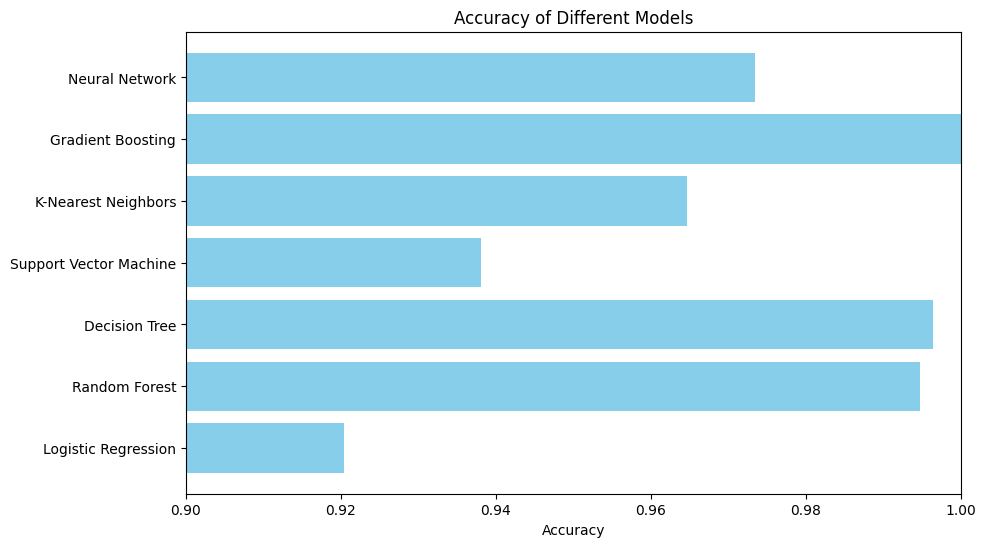

In [166]:
import matplotlib.pyplot as plt

# Các giá trị accuracy
accuracies = [accuracy_test_log, accuracy_test_rf, accuracy_test_dt, accuracy_test_svm, accuracy_test_knn, accuracy_test_gb, accuracy_test_nn]

# Tên của các mô hình
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting', 'Neural Network']

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0.9, 1.0)  
plt.show()

Accuracy on Training Set (Logistic Regression): 0.9552701505757307
Accuracy on Training Set (Random Forest): 1.0
Accuracy on Training Set (Decision Tree): 1.0
Accuracy on Training Set (SVM): 0.9734278122232064
Accuracy on Training Set (KNN): 0.983613817537644
Accuracy on Training Set (Gradient Boosting): 0.9973427812223207
Accuracy on Training Set (Neural Network): 1.0


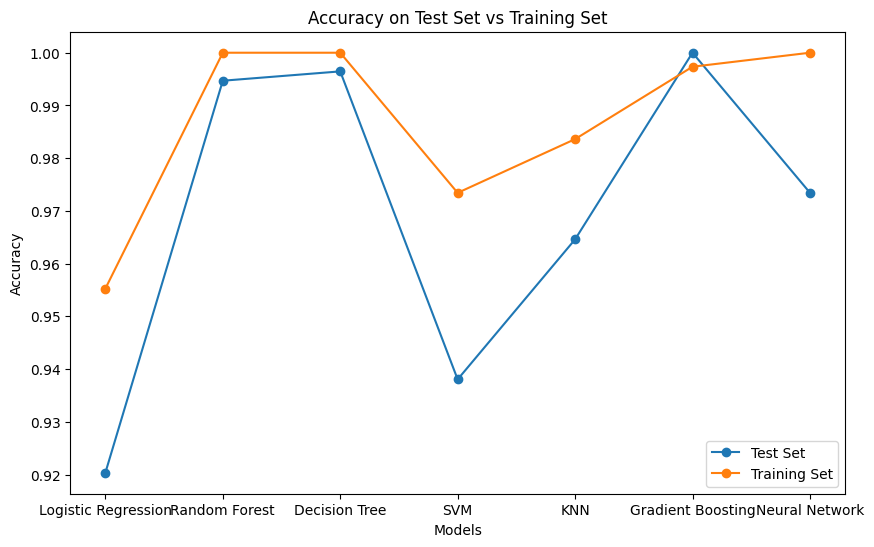

In [167]:

accuracy_train_log = accuracy_score(y_train, logistic_model.predict(X_train_processed))


accuracy_train_rf = accuracy_score(y_train, random_forest_model.predict(X_train_processed))


accuracy_train_dt = accuracy_score(y_train, decision_tree_model.predict(X_train_processed))


accuracy_train_svm = accuracy_score(y_train, svm_model.predict(X_train_processed))


accuracy_train_knn = accuracy_score(y_train, knn_model.predict(X_train_processed))


accuracy_train_gb = accuracy_score(y_train, gb_model.predict(X_train_processed))


accuracy_train_nn = accuracy_score(y_train, nn_model.predict(X_train_processed))


# Hiển thị độ chính xác trên tập huấn luyện
print("Accuracy on Training Set (Logistic Regression):", accuracy_train_log)
print("Accuracy on Training Set (Random Forest):", accuracy_train_rf)
print("Accuracy on Training Set (Decision Tree):", accuracy_train_dt)
print("Accuracy on Training Set (SVM):", accuracy_train_svm)
print("Accuracy on Training Set (KNN):", accuracy_train_knn)
print("Accuracy on Training Set (Gradient Boosting):", accuracy_train_gb)
print("Accuracy on Training Set (Neural Network):", accuracy_train_nn)

# Vẽ biểu đồ chênh lệch
models = ["Logistic Regression", "Random Forest", "Decision Tree", "SVM", "KNN", "Gradient Boosting", "Neural Network"]
test_accuracies = [accuracy_test_log, accuracy_test_rf, accuracy_test_dt, accuracy_test_svm, accuracy_test_knn, accuracy_test_gb, accuracy_test_nn]
train_accuracies = [accuracy_train_log, accuracy_train_rf, accuracy_train_dt, accuracy_train_svm, accuracy_train_knn, accuracy_train_gb, accuracy_train_nn]

plt.figure(figsize=(10, 6))
plt.plot(models, test_accuracies, label='Test Set', marker='o')
plt.plot(models, train_accuracies, label='Training Set', marker='o')
plt.title('Accuracy on Test Set vs Training Set')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

521H0471-Võ Gia Phong
Requie 3

1. Feed Forward Neural Network 

In [168]:
#Feed Forward Neural Network

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD

# Chuyển đổi nhãn sang dạng one-hot vector
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Khởi tạo mô hình
model = Sequential()

# Thêm các layer
model.add(Dense(100, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])#optimizer=SGD(lr=0.01) : tốc độ học tập

# Đào tạo mô hình
model.fit(X_train_processed, y_train_onehot, epochs=100, batch_size=32, verbose=1) 

Epoch 1/100
71/71 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.9207
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.9318
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9318
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9318
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9318
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9318
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9318
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9318
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9318
Epoch 10/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9318
Epoch 11/

In [169]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               40500     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 2)                 202       
                                                                 
Total params: 50802 (198.45 KB)
Trainable params: 50802 (198.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [170]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(X_test_processed, y_test_onehot)
print('Test accuracy:', test_acc*100)

18/18 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9735
Test accuracy: 97.3451316356659


2. Reccurent Neural Network 

In [171]:
#Recurrent Neural Network

from keras.layers import LSTM

# Convert sparse matrix to dense numpy array before reshaping
X_train_processed = X_train_processed.toarray()
X_test_processed = X_test_processed.toarray()

# Reshape input to be 3D [samples, timesteps, features]
X_train_processed = X_train_processed.reshape((X_train_processed.shape[0], X_train_processed.shape[1], 1))
X_test_processed = X_test_processed.reshape((X_test_processed.shape[0], X_test_processed.shape[1], 1))

# Khởi tạo mô hình
model = Sequential()

# Thêm các layer
model.add(LSTM(100, activation='relu', input_shape=(X_train_processed.shape[1], 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 2)                 202       
                                                                 
Total params: 51102 (199.62 KB)
Trainable params: 51102 (199.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
# Đào tạo mô hình
model.fit(X_train_processed, y_train_onehot, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
71/71 [==============================] - 8s 103ms/step - loss: 0.5161 - accuracy: 0.9318
Epoch 2/100
71/71 [==============================] - 7s 100ms/step - loss: 0.3372 - accuracy: 0.9318
Epoch 3/100
71/71 [==============================] - 8s 106ms/step - loss: 0.2769 - accuracy: 0.9318
Epoch 4/100
71/71 [==============================] - 10s 140ms/step - loss: 0.2578 - accuracy: 0.9318
Epoch 5/100
71/71 [==============================] - 8s 109ms/step - loss: 0.2518 - accuracy: 0.9318
Epoch 6/100
71/71 [==============================] - 7s 100ms/step - loss: 0.2499 - accuracy: 0.9318
Epoch 7/100
71/71 [==============================] - 7s 102ms/step - loss: 0.2492 - accuracy: 0.9318
Epoch 8/100
71/71 [==============================] - 8s 108ms/step - loss: 0.2491 - accuracy: 0.9318
Epoch 9/100
71/71 [==============================] - 8s 108ms/step - loss: 0.2491 - accuracy: 0.9318
Epoch 10/100
71/71 [==============================] - 7s 105ms/step - loss: 0.2491 - accur

In [174]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(X_test_processed, y_test_onehot)
print('Test accuracy:', test_acc*100)

18/18 [==============================] - 1s 42ms/step - loss: 0.3113 - accuracy: 0.9080
Test accuracy: 90.79645872116089


3. So Sánh và đánh giá độ chính xác mô hình

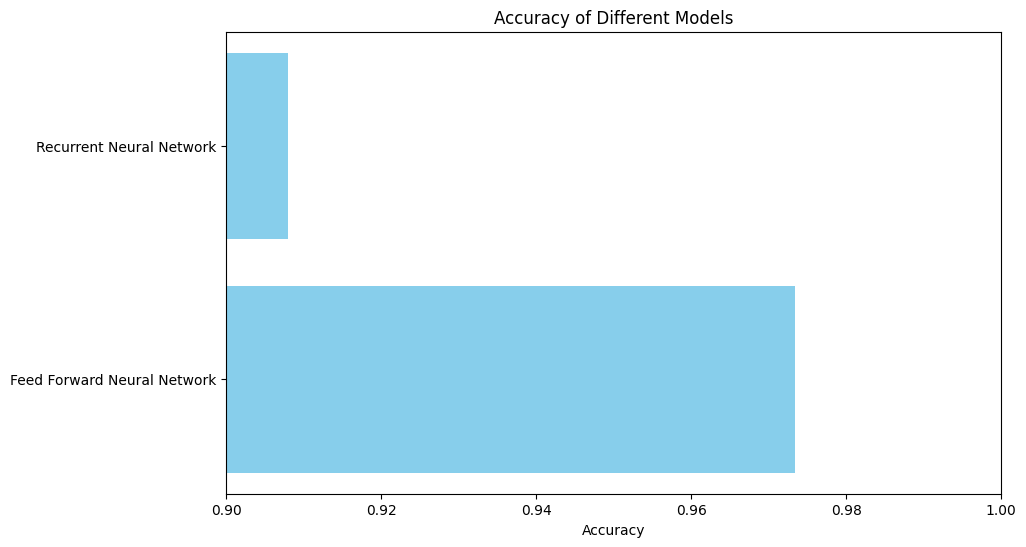

In [177]:
#Tạo biểu đồ so sánh RNN và FFNN

# Các giá trị accuracy
accuracies = [accuracy_test_nn, test_acc]
models = ['Feed Forward Neural Network', 'Recurrent Neural Network']

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0.9, 1.0)
plt.show()

- Dựa trên kết quả độ chính xác trên tập kiểm tra, mô hình Feed-Forward Neural Network (FFNN) có độ chính xác cao hơn so với mô hình Recurrent Neural Network (RNN). Điều này có thể do FFNN tốt hơn trong việc học các mô hình dự đoán từ dữ liệu và có thể thấy RNN không được cấu hình tốt nhất cho tác vụ này.
- Dựa vào thời gian Training Model: RNN phức tạp hơn và mất nhiều thời gian để huấn luyện hơn so với FFNN, FFNN có thể là lựa chọn tốt hơn.

Require 4

1. Feed Forward Neural Network Overfitting Dropout

In [179]:
#Feed forward neural network Dropout Regularization

from keras.layers import Dropout

# Khởi tạo mô hình
model = Sequential()

# Thêm các layer
model.add(Dense(100, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               40500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 2)                 202       
                                                                 
Total params: 50802 (198.45 KB)
Trainable params: 50802 (198.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
# Đào tạo mô hình
model.fit(X_train_processed, y_train_onehot, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
71/71 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.9203
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9318
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9318
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9318
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9318
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9318
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9318
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9318
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9318
Epoch 10/100
71/71 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9318
Epoch 11/

In [183]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(X_test_processed, y_test_onehot)
print('Test accuracy:', test_acc*100)

18/18 [==============================] - 0s 941us/step - loss: 0.0610 - accuracy: 0.9823
Test accuracy: 98.2300877571106


Tỉ lệ chính xác đã được cải thiện từ 97% thành 98%, dù chỉ là 1% nhưng Mỗi bước tăng độ chính xác trong các bài toán phân loại và dự đoán có thể mang lại giá trị quan trọng

2. RNN With Dropout

In [192]:
# Recurrent neural network Dropout Regularization
#use L1 and L2 regularization, Dropout

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.regularizers import l1_l2

# Define the model
model = Sequential()

# Add the layers
model.add(LSTM(100, activation='relu', input_shape=(X_train_processed.shape[1], 1), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 2)                 202       
                                                                 
Total params: 51102 (199.62 KB)
Trainable params: 51102 (199.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model.fit(X_train_processed, y_train_onehot, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
71/71 [==============================] - 8s 108ms/step - loss: 0.2543 - accuracy: 0.9318
Epoch 2/100
71/71 [==============================] - 8s 109ms/step - loss: 0.2554 - accuracy: 0.9318
Epoch 3/100
71/71 [==============================] - 7s 104ms/step - loss: 0.2567 - accuracy: 0.9318
Epoch 4/100
71/71 [==============================] - 8s 107ms/step - loss: 0.2538 - accuracy: 0.9318
Epoch 5/100
71/71 [==============================] - 7s 103ms/step - loss: 0.2555 - accuracy: 0.9318
Epoch 6/100
71/71 [==============================] - 7s 105ms/step - loss: 0.2539 - accuracy: 0.9318
Epoch 7/100
71/71 [==============================] - 7s 100ms/step - loss: 0.2533 - accuracy: 0.9318
Epoch 8/100
71/71 [==============================] - 8s 112ms/step - loss: 0.2537 - accuracy: 0.9318
Epoch 9/100
71/71 [==============================] - 8s 118ms/step - loss: 0.2549 - accuracy: 0.9318
Epoch 10/100
71/71 [==============================] - 8s 109ms/step - loss: 0.2541 - accura

In [202]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(X_test_processed, y_test_onehot)
print('Test accuracy:', test_acc*100)

18/18 [==============================] - 1s 43ms/step - loss: 0.3167 - accuracy: 0.9080
Test accuracy: 90.79645872116089


Đã sử dụng phương pháp L1 and L2 regularization, Dropout và tỉ lệ chính xác không thay đồi. Có thể mô hình đã đạt tới giới hạn tối ưu.

Require 5

Sau khi huấn luyện mô hình, có một số cách để cải thiện độ chính xác:

1. **Phân tích lỗi**: Xem xét các trường hợp mà mô hình dự đoán sai. Điều này có thể giúp bạn hiểu được mô hình mắc lỗi ở đâu và tìm ra cách để cải thiện nó.

2. **Tinh chỉnh mô hình**: Điều chỉnh các tham số của mô hình, như số lượng và kích thước của các lớp ẩn, tốc độ học, và các tham số khác. Bạn cũng có thể thử sử dụng các kỹ thuật regularization khác nhau để tránh overfitting.

3. **Thu thập thêm dữ liệu**: Nếu có thể, thu thập thêm dữ liệu có thể giúp cải thiện độ chính xác của mô hình. Bạn cũng có thể thử sử dụng các kỹ thuật tăng cường dữ liệu (data augmentation) để tạo ra thêm dữ liệu huấn luyện.

4. **Thử sử dụng một mô hình khác**: Đôi khi, một mô hình khác có thể hoạt động tốt hơn trên dữ liệu của bạn. Bạn có thể thử sử dụng các mô hình khác nhau và xem mô hình nào hoạt động tốt nhất.

Để phân tích các trường hợp sai, ta cần thu thập dữ liệu về các trường hợp đó. Dữ liệu này có thể bao gồm:

+ Kết quả dự đoán của mô hình
+ Kết quả thực tế
+ Thông tin về dữ liệu đầu vào

Từ dữ liệu này, ta có thể phân tích các trường hợp sai theo các tiêu chí sau:

+ **Loại sai sót**: Có bao nhiêu loại sai sót khác nhau? Sai sót nào phổ biến nhất?
+ **Nguyên nhân của sai sót**: Sai sót là do đâu? Do dữ liệu huấn luyện không đầy đủ, không chính xác, hay do cấu trúc mô hình không phù hợp?
+ **Ảnh hưởng của sai só**t: Sai sót có ảnh hưởng gì đến kết quả dự đoán?
Đề ra giải pháp

Sau khi phân tích các trường hợp sai, ta có thể đề ra các giải pháp để khắc phục vấn đề. Các giải pháp này có thể bao gồm:

+ **Tăng cường dữ liệu huấn luyện**: Thêm dữ liệu mới, hoặc sử dụng các kỹ thuật data augmentation để tạo ra các dữ liệu mới từ dữ liệu cũ.
+ **Sử dụng các kỹ thuật regularizarion**: Giúp giảm thiểu phương sai của mô hình, từ đó cải thiện khả năng tổng quát hóa của mô hình.
+ **Thay đổi cấu trúc mô hình**: Thay đổi cấu trúc mô hình để cải thiện khả năng học hỏi của mô hình.
Thực hiện giải pháp

Sau khi đề ra giải pháp, ta cần thực hiện giải pháp đó trên mô hình. Ta cần theo dõi kết quả của mô hình sau khi áp dụng giải pháp để đánh giá xem giải pháp có hiệu quả hay không.